<a href="https://colab.research.google.com/github/dipmay-biswas/Soft-Computing-laboratory/blob/master/2021CSB043_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 4: Radial Basis Function Neural Network

> Name: ***Dipmay Biswas***

> Enrollment ID: ***2021CSB043***

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

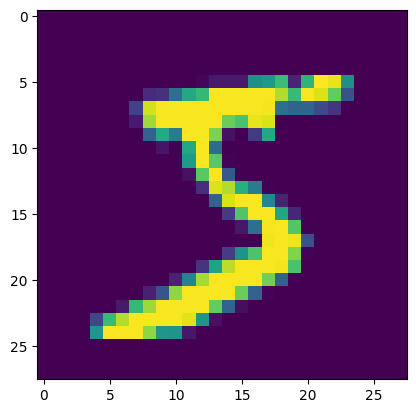

In [3]:
plt.imshow(x_train[0])

In [4]:
def RBF(x, c, s):
  return (np.exp(-np.sum((x - c)**2)/2*(s**2)))

In [5]:
2**2

4

In [6]:
newX_train = []
newX_test = []

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
for img in range(x_train.shape[0]):
  # print(i)
  image = x_train[img]
  mean = np.mean(image)
  # print(mean)
  newImg = np.zeros((32, 32))
  for i in range(32):
    for j in range(32):
      x, y = i%28 , j%28

      newImg[i][j] = RBF(image[x, y], mean, 1)
  newX_train.append(newImg)

In [9]:
x_train = np.array(newX_train)

In [10]:
x_train.shape

(60000, 32, 32)

In [11]:
for img in range(x_test.shape[0]):
  # print(i)
  image = x_test[img]
  mean = np.mean(image)
  # print(mean)
  newImg = np.zeros((32, 32))
  for i in range(32):
    for j in range(32):
      x, y = i%28 , j%28

      newImg[i][j] = RBF(image[x, y], mean, 1)
  newX_test.append(newImg)

In [12]:
x_test = np.array(newX_test)

In [13]:
rbfmodel = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32*32, activation=tf.nn.relu),
      # ''' Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(1400, activation=tf.math.sigmoid),
      # tf.keras.layers.Dense(128, activation= '''TODO'''),

      # ''' Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      #  Dense layer to output classification probabilities

  ])
rbfmodel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
BATCH_SIZE = 64
EPOCHS = 20

history = rbfmodel.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
938/938 [==============================] - 29s 31ms/step - loss: 4.0470 - accuracy: 0.1027
Epoch 2/20
938/938 [==============================] - 29s 30ms/step - loss: 2.3437 - accuracy: 0.1040
Epoch 3/20
938/938 [==============================] - 28s 30ms/step - loss: 2.3201 - accuracy: 0.1059
Epoch 4/20
938/938 [==============================] - 29s 31ms/step - loss: 2.3127 - accuracy: 0.1059
Epoch 5/20
938/938 [==============================] - 29s 31ms/step - loss: 2.3093 - accuracy: 0.1084
Epoch 6/20
938/938 [==============================] - 29s 31ms/step - loss: 2.3073 - accuracy: 0.1081
Epoch 7/20
938/938 [==============================] - 29s 31ms/step - loss: 2.3046 - accuracy: 0.1090
Epoch 8/20
938/938 [==============================] - 28s 30ms/step - loss: 2.3037 - accuracy: 0.1130
Epoch 9/20
938/938 [==============================] - 28s 30ms/step - loss: 2.3027 - accuracy: 0.1150
Epoch 10/20
938/938 [==============================] - 28s 29ms/step - loss: 2.301

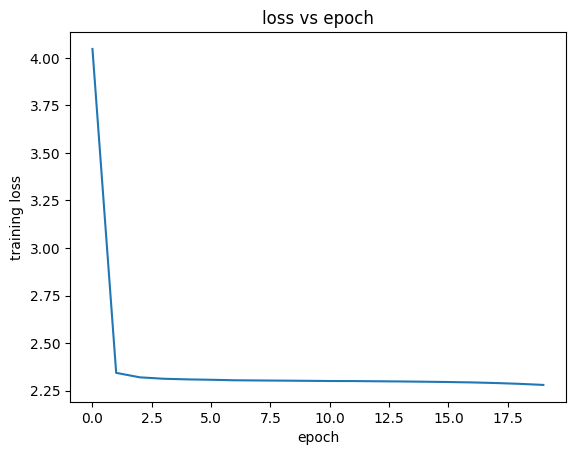

In [15]:
plt.plot(history.history['loss'])
plt.title("loss vs epoch")
plt.xlabel("epoch")
plt.ylabel("training loss")
plt.savefig("Performance")

In [16]:
print("evaluation accuracy")
eval = rbfmodel.evaluate(x = x_test, y = y_test, batch_size = 1)

evaluation accuracy
10000/10000 [==============================] - 23s 2ms/step - loss: 2.2823 - accuracy: 0.1549


In [17]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Make predictions on the test data
y_pred = rbfmodel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred_classes, average=None)
recall = recall_score(y_test, y_pred_classes, average=None)
f1 = f1_score(y_test, y_pred_classes, average=None)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Print precision, recall, and F1-score for each class
for i in range(10):
    print(f'Class {i}: Precision={precision[i]}, Recall={recall[i]}, F1-Score={f1[i]}')

313/313 [==============================] - 2s 7ms/step
Accuracy: 0.1549
Confusion Matrix:
[[ 194  531    0    0    0    0    0  255    0    0]
 [  22 1002    0    0    0    0    0  111    0    0]
 [ 163  603    0    0    0    0    0  266    0    0]
 [ 179  545    0    0    0    0    0  286    0    0]
 [ 147  522    0    0    0    0    0  313    0    0]
 [ 130  511    0    0    0    0    0  251    0    0]
 [ 176  567    0    0    0    0    0  215    0    0]
 [  83  592    0    0    0    0    0  353    0    0]
 [ 146  532    0    0    0    0    0  296    0    0]
 [  95  571    0    0    0    0    0  343    0    0]]
Class 0: Precision=0.1453183520599251, Recall=0.19795918367346937, F1-Score=0.16760259179265657
Class 1: Precision=0.1676706827309237, Recall=0.8828193832599119, F1-Score=0.28181690338911547
Class 2: Precision=0.0, Recall=0.0, F1-Score=0.0
Class 3: Precision=0.0, Recall=0.0, F1-Score=0.0
Class 4: Precision=0.0, Recall=0.0, F1-Score=0.0
Class 5: Precision=0.0, Recall=0.0, F1-Sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#*Thank you!*